# Deep Learning for Business Applications course

## TOPIC 17: Summarization

In this work, we will develop a summarization model based on a pretrainded Large language model.

### 1. Language model

Suppose we have an input sequence of tokens of lenght $k$:
$$w_{1}, w_{2},..., w_{t}, ..., w_{k}$$

__Language model__ is a probability distribution over words of a sequence:

$$P(w_{1}, w_{2},..., w_{t}, ..., w_{k})$$

In other words, this is the probability of receiving a given sequence of tokens.
The goal of the language model is to calculate this probability.

We can rewrite this probability using chain rule:

$$P(w_{1}, w_{2}, ..., w_{k}) = P(w_{k}|w_{1}, w_{2}, ..., w_{k-1})P(w_{1}, w_{2}, ..., w_{k-1});$$
$$P(w_{1}, w_{2}, ..., w_{k-1}) = P(w_{k-1}|w_{1}, w_{2}, ..., w_{k-2})P(w_{1}, w_{2}, ..., w_{k-2});$$
$$...$$
$$P(w_{1}, w_{2}, w_{3})=P(w_{3}|w_{1}, w_{2})P(w_{1}, w_{2})$$
$$P(w_{1}, w_{2})=P(w_{2}|w_{1})P(w_{1}).$$

Hence,
$$P(w_{1}, w_{2}, ..., w_{k})=P(w_{k}|w_{1}, w_{2}, ..., w_{k-1})P(w_{k-1}|w_{1}, w_{2}, ..., w_{k-2})...P(w_{3}|w_{1}, w_{2})P(w_{2}|w_{1})P(w_{1})$$

Chain rule allowed us to move from calculating the probability of receiving the entire sequence of tokens to calculating the probability of the next token if the previous ones are known:

$$P(w_{i}|w_{i-1},..., w_{1})$$

Thus, an alternative definition of the language model can be given.

__Language model__ is a conditional distribution over the next token in a sequence if the previous tokens are given.

In simple terms, __language modeling__ is the task of predicting the next token in a sequence.

### 2. Large language model (LLM)
What is LLM? There is no clear definition yet. One can say that,

__LLM__ - is a language model, which is usually based on a transformer-like architecture with billions of trainable parameters. The transformer architecture from the original <a href="https://arxiv.org/pdf/1706.03762.pdf">paper</a> is depicted below.

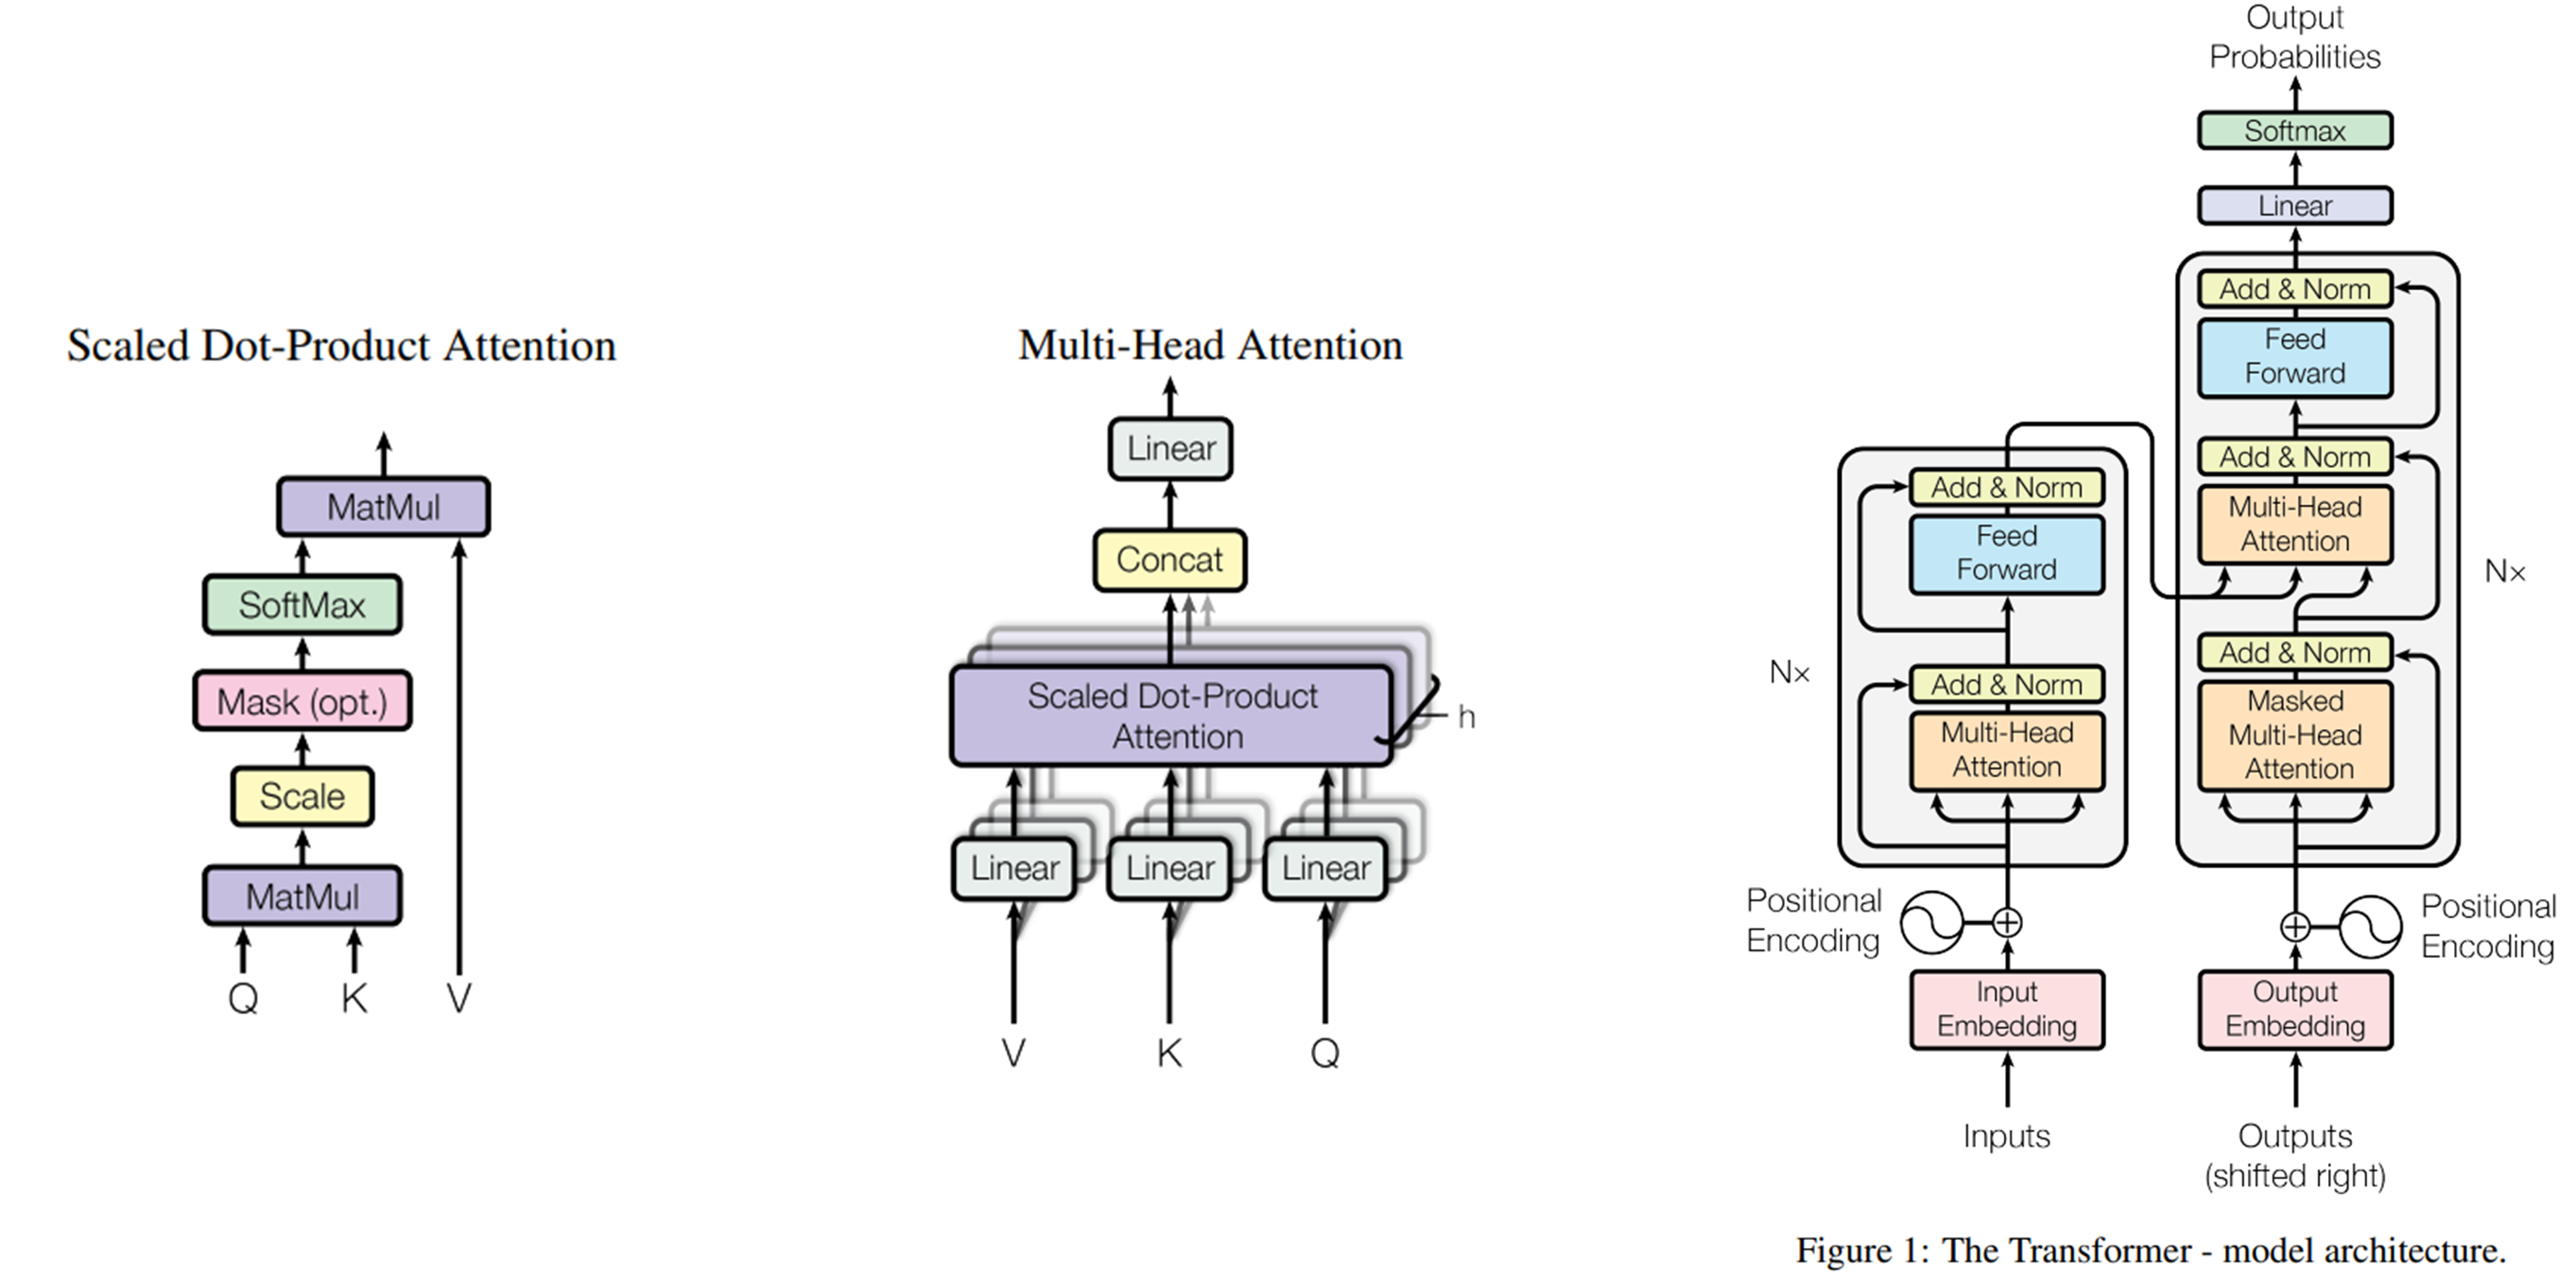

Google's T5 is an example of a model that fully adheres to the original Transformer architecture.

OpenAI chose a different path and completely removed the encoder from the original transformer, leaving only the decoder that generates tokens. They called it Generative pre-trained transformer (GPT).

The table below shows sizes of some LLMs and the datasets on which they were trained.

<table>
    <tr>
        <th>Model</th>
        <th>Release date</th>
        <th>Number of parameters</th>
        <th>Corpus size</th>
    </tr>
    <tr>
        <td>GPT-3</td>
        <td>May 2020</td>
        <td>175 billion</td>
        <td>300 billion tokens</td>
    </tr>
    <tr>
        <td>YaLM 100B</td>
        <td>June 2022</td>
        <td>100 billion</td>
        <td>1.7TB</td>
    </tr>
    <tr>
        <td>LLaMA</td>
        <td>February 2023</td>
        <td>65 billion</td>
        <td>1.4 trillion</td>
    </tr>
    <tr>
        <td>GPT-4</td>
        <td>March 2023</td>
        <td>unknown</td>
        <td>unknown</td>
    </tr>
    <tr>
        <td>BloombergGPT</td>
        <td>March 2023</td>
        <td>50 billion</td>
        <td>363 billion tokens (Bloomberg's data) + 345 billion tokens (general datasets)</td>
    </tr>
    <tr>
        <td>Llama 2</td>
        <td>July 2023</td>
        <td>70 billion</td>
        <td>2 trillion tokens</td>
    </tr>
</table>

### 3. LLM pretraining

Large language models are first pre-trained on a large corpus of texts. According to the definition, they receive a sequence of tokens as input (generally their identifiers in the dictionary), and then predict the next token (identifier).

In this regard, each document is divided into several input-target pairs, where target is the next token, and input is the sequence of tokens preceding it.
$ $
<table>
    <tr>
        <td>$x_{1}$</td>
        <td>→</td>
        <td>$x_{2}$</td>
    </tr>
    <tr>
        <td>$x_{1}$</td>
        <td>$x_{2}$</td>
        <td>→</td>
        <td>$x_{3}$</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td>...</td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td>$x_{1}$</td>
        <td>$x_{2}$</td>
        <td>...</td>
        <td>$x_{k-1}$</td>
        <td>→</td>
        <th>$x_{k}$</th>
    </tr>
</table>

The pre-training stage allows the model to better understand the semantics of the language.

### 4. LLM inference

At the inference stage, the LLM generates the first token, then takes it as input and generates the second token. After that, it takes both the first and second tokens as input, and then generates the third token. And so on, the model generates tokens one by one.

Strictly speaking, it is not the token itself that is predicted, but the distribution over all tokens in the dictionary.

How to choose the right token from this distribution?

The method of selecting the next token from the language model distribution is called __decoding strategy__. There are a lot of them.

<table>
    <tr>
        <th>Decoding strategy</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Greedy strategy</td>
        <td>Select token with maximum probability at each generation step.</td>
    </tr>
    <tr>
        <td>Beam Search</td>
        <td>
            1. At the current step predict distribution over all tokens in vocabulary.<br><br>
            2. Select the best B candidates with the highest probability.<br><br>
            3. At the next step for each of B candidates predict distribution over all tokens in vocabulary.<br><br>
            4. Select the best B sequences with the highest probability from all the resulting sequences.<br><br>
            5. Repeat.
        </td>
    </tr>
    <tr>
        <td>Random Sampling</td>
        <td>Select random token from conditional distribution.</td>
    </tr>
    <tr>
        <td>Temperature Random Sampling</td>
        <td>
            1. Increase/decrease probabilities for each possible token using temperature parameter.<br><br>
            2. Select random token from received conditional distribution.
        </td>
    </tr>
    <tr>
        <td>Top-K Sampling</td>
        <td>Select top K most probable tokens and sample from them.</td>
    </tr>
    <tr>
        <td>Nucleus Sampling</td>
        <td>
            1. Dynamically choose the number of K most probable tokens<br><br>
            2. Sample from them.
        </td>
    </tr>
</table>
  
#### 4.1. Temperature Random Sampling.
Softmax function with temperature is applied to the model logits. A hyperparameter $T$ called temperature is added to the softmax function. The closer the temperature is to zero, the more similar the softmax function will be to argmax function. The higher the temperature, the higher the chance of choosing a token different from the token that has the maximum probability.
$$softmax(x_{1}/T, x_{2}/T, ..., x_{n}/T)_{k}=\frac{e^{x_{k}/T}}{\sum_{i=1}^{n}e^{x_{i}/T}}$$

#### 4.2. Top-P Sampling (Nucleus Sampling).
The token is sampled from a subset of the most probable tokens, the total probability of which is equal to P.

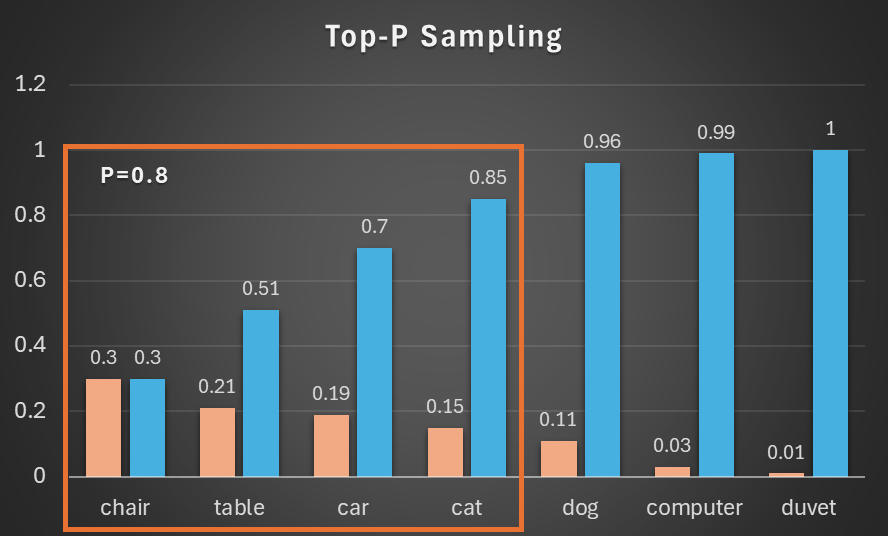

In this work, we will not implement each of these approaches, but will only use a library that offers a default generation method.

### 5. LLM fine-tuning

A model that generates token after token without a specific purpose is not very useful itself. Therefore, at the fine-tuning stage, the model learns to solve a wide variety of problems. The greater the variety, the better the model will deal with new problems.

This approach is very well illustrated on Google's <a href="https://huggingface.co/google/flan-t5-base">flan-t5</a> model page:


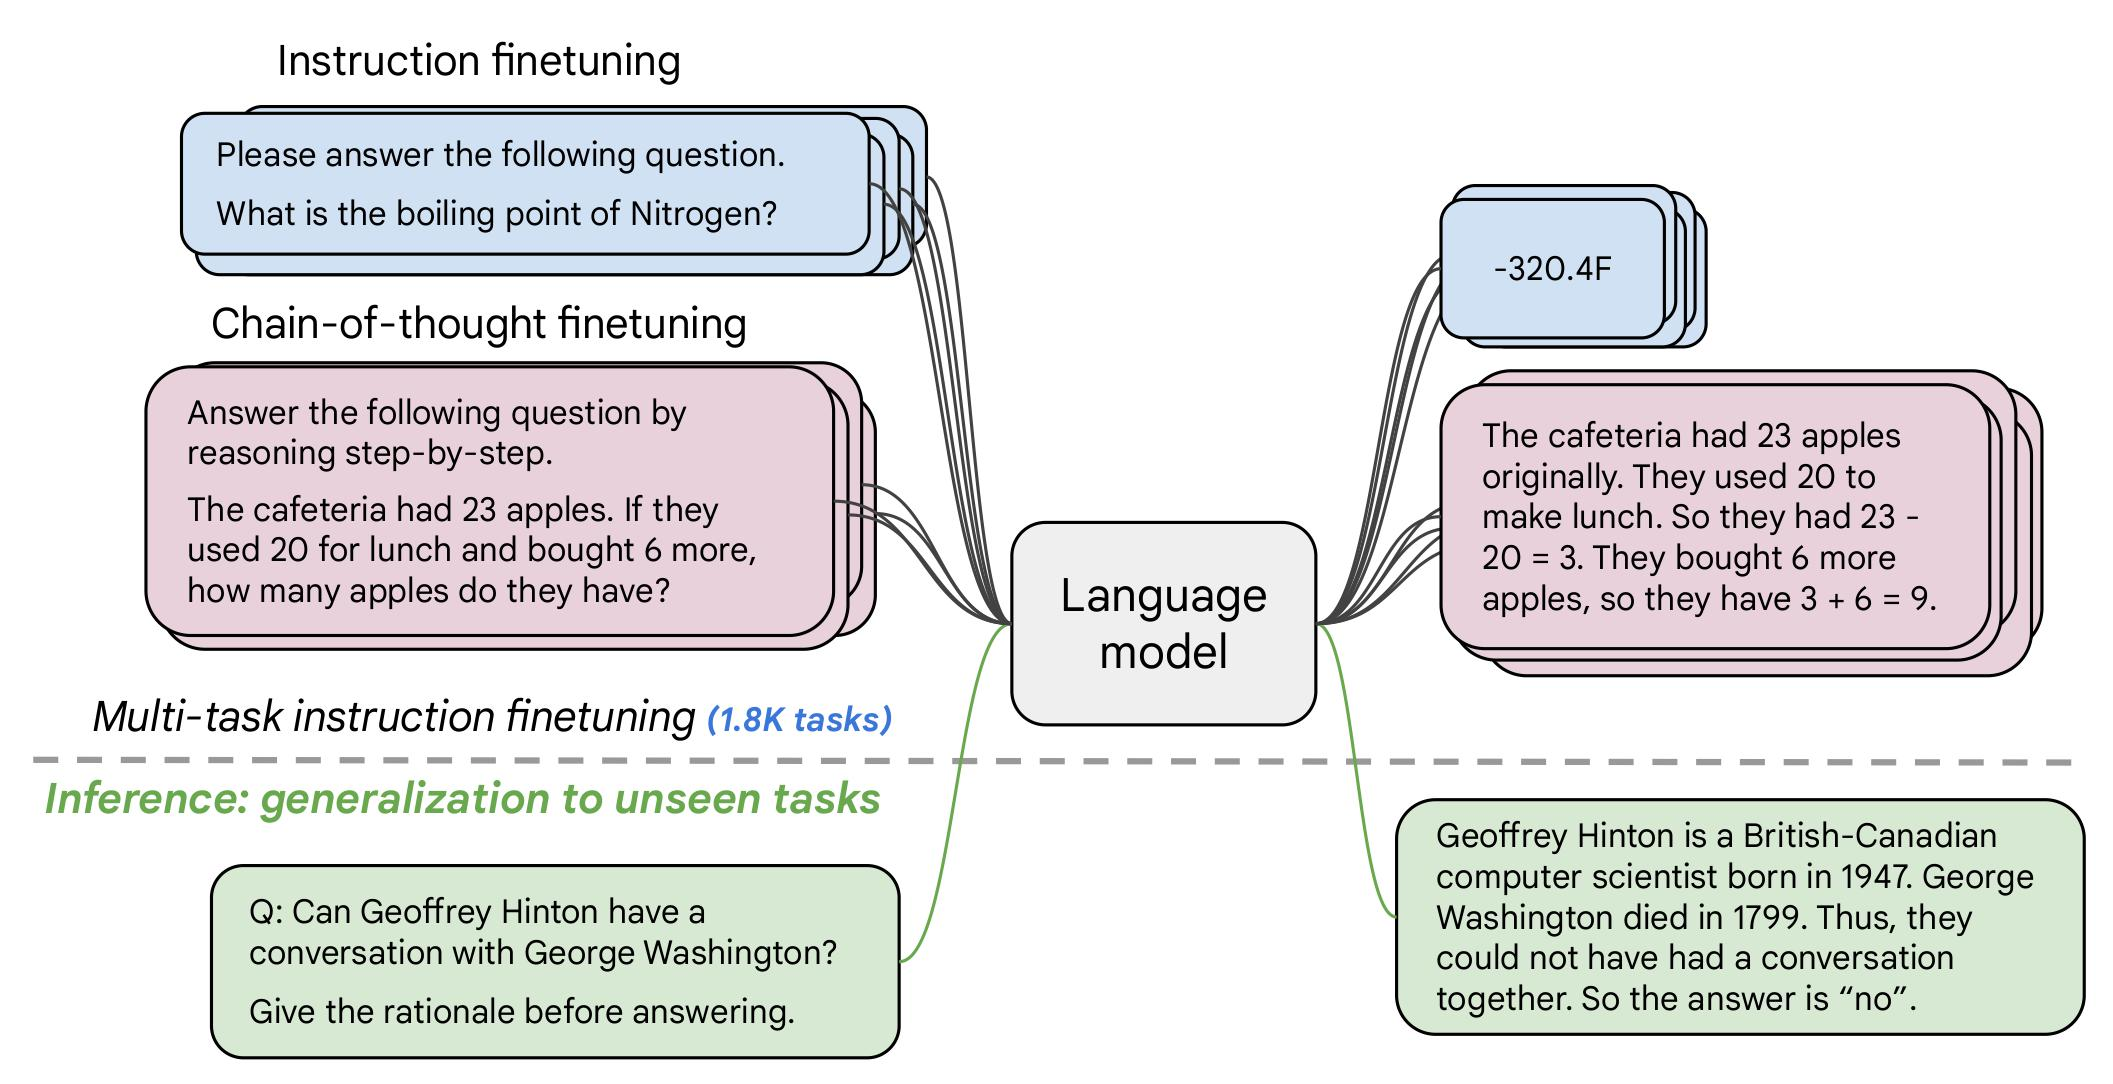

The input to the model is text, which can be divided into two parts:
* Prompt: a natural language query that contains what you want from the model.
* Context: any text you want to do something with.

At the training stage, the target variable is the text that you would like to receive as the output of the model.

The interesting thing is that almost any problem can be solved in this formulation.

Let's look at the examples.
1. Classification:
    * Prompt: `Which class does this article belong to: mathematics, philosophy or history?`
    * Context: `The gradient of a function is the vector of its partial derivatives.`
    * Output: `mathematics`
2. Named entity recognition.
    * Prompt: `Find me organizations and locations in this text.`
    * Context: `Burger World franchise owner John Doe has opened a new restaurant in Highland, Texas.`
    * Output: `Organizations: Burger World. Locations: Highland, Texas.`
3. Question answering.
    * Prompt + Context: `How are you doing? `
    * Output: `I am a model. How do you think I'm doing?`
4. Summarization... Let's discuss it in more detail in the next section...
5. ...

An example of implementing this approach is <a href="https://arxiv.org/abs/2303.17564">BloombergGPT</a>. __Training took 53 days on 512 GPU NVIDIA Tesla A100 40GB!__

The <a href="https://openai.com/research/instruction-following">ChatGPT</a> model from OpenAI has generated the most excitement. Unfortunately, they do not disclose details, but they shared the idea. One can only guess how many GPU resources they used. Most likely many times more than Bloomberg. The only thing they revealed was the methodology. They have an additional third stage of fine-tuning using the __reinforcement learning from human feedback (RLHF)__.
The topic of __deep reinforcement learning__ deserves a separate course, so it will not be covered in this work.


### 6. Summarization
__Summarization__ is the task of producing a shorter version of a document while preserving its important information.

There are two types of summarization:
1. __Extractive summarization__ is a summarization in which the most important fragments are highlighted in the original text.
2. __Abstractive summarization__ is a summarization that generates a new text containing the most important information.

We will solve the abstractive summarization problem, and for this we will fine-tune LLM. But how can we do this if we need a whole cluster with a GPU and we only have one GPU v100 16GB? __Parameter-Efficient Fine-Tuning (PEFT)__ will help us get around the problem of lack of resources.

### 7. Parameter-Efficient Fine-Tuning (PEFT)

According to this <a href="https://arxiv.org/pdf/2312.12148.pdf">paper</a> __Parameter Efficient Fine-Tuning (PEFT)__ offers an effective solution by reducing the number of fine-tuning parameters and memory usage while achieving comparable performance to full fine-tuning. In the same article you can find an excellent picture of PEFT methods. In our work we will consider only one method: <a href="https://arxiv.org/pdf/2106.09685.pdf">__Low-Rank Adaptation(LoRA)__</a>.

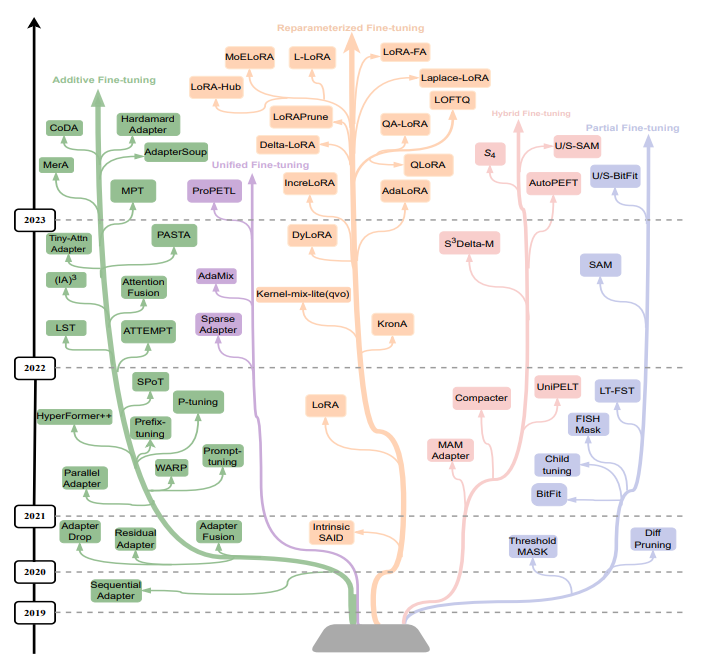

### 8. Low-Rank Adaptation (LoRA)

The idea of LoRA is very simple. Let's think about what any neural network consists of? Roughly speaking, a neural network can be represented as a bunch of matrices. What happens to matrices during the training stage? The weights change in them. Let's consider the idea using a linear layer as an example.

Assume that before fine-tuning we have some weight matrix $Θ$ of dimention $m × n$. This matrix transforms the input vector $x$ of dimension $n × 1$ into a vector $h$ of dimension $m × 1$ as follows:

$$h = Θx$$

After fine-tuning, matrix $Θ$ turned into some other matrix $Θ^{'}$ of the same dimension. Now the vector $h$ is calculated like this:

$$\begin{equation}
\tag{1}
h = Θ^{'}x
\end{equation}$$

Let's find how different one matrix is from another by calculating their difference $ΔΘ$:

$$ΔΘ = Θ^{'} - Θ$$

Let's rewrite this equation:

$$\begin{equation}
\tag{2}
Θ^{'} = Θ + ΔΘ
\end{equation}$$

From equations (1) and (2) we get:

$$\begin{equation}
\tag{3}
h = (Θ + ΔΘ)x = Θx + ΔΘx
\end{equation}$$


Let's freeze weights $Θ$ of LLM and train weights $ΔΘ$ instead. But since matrix $ΔΘ$ has the same dimension, we gain nothing, because we still should train $m \cdot n$ parameters. There's one trick to do here.

Recall that we can represent a matrix as the product of two other matrices. Let's do this for matrix ΔΘ, presenting it as a product of lower rank matrices $A$ and $B$, with dimensions $m × r$ and $r × n$ respectively, where $r < min(m, n)$:

$$\begin{equation}
\tag{4}
ΔΘ = AB
\end{equation}$$

Putting equations (3) and (4) together, we get:

$$\begin{equation}
\tag{5}
h = Θx + ABx
\end{equation}$$

where $A$ and $B$ are trainable parameters.
This approach can be illustrated by picture from paper about <a href="https://arxiv.org/pdf/2106.09685.pdf">LoRA</a>.

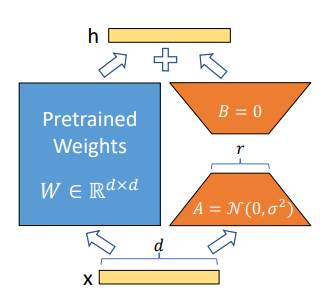

Thus, instead of fine-tuning matrix $Θ$ with the number of parameters $m \cdot n$, we freese it and train only two matrices $A$ and $B$ of the lower rank $r$ and lower number of parameters $m \cdot r + r \cdot n = r \cdot (m + n) < m \cdot n$.

Rank $r$ is a hyperparameter of algorithm and should be chosen manually.

To better understand how much trainable parameters we reduce, consider an example. Let's assume $m = 768, n = 512, r = 8$.

If we fine-tune the entire matrix $Θ$, then the number of trainable parameters will be:

$$m \cdot n = 768 \cdot 512 = 393,216$$

If we use LoRA, then the number of trainable parameters will be:

$$r \cdot (m + n) = 8 \cdot (768 + 512) = 10,240$$

In this example, the number of trainable parameters was reduced by $97.4\%$.

There are two improvements for LoRA.

1. An analogue of the learning rate is added to equation 5 in the following form:
$$\begin{equation}
\tag{6}
h = Θx + \frac{α}{r} ABx
\end{equation},$$
where $α ≤ r$.

2. <a href="https://arxiv.org/pdf/2312.03732.pdf">Experiments</a> show that if we replace $r$ in the formula (6) with the $\sqrt{r}$, then the algorithm converges more stable
$$\begin{equation}
\tag{7}
h = Θx + \frac{α}{\sqrt{r}} ABx
\end{equation}$$

### 9. Text generation quality metrics

Imagine that the model is trained. How can we measure its quality now?
Let's assume that we have some text and a corresponding referemce summary $s$ written by an expert. Now we feed the text to the model, which generates another summary $g$.

Let referemce summary (tokenized) looks like this:  
$s$ = `the` `quick` `brown` `fox` `jumps` `over` `the` `lazy` `dog`

The model can generate any summary. For example:
1. $g_{1}$ = `the` `quick` `brown` `fox` `jumps` `over` `the` `lazy` `dog` - ideally, the model generated the same summary as the expert one.
2. $g_{2}$ = `I` `do` `not` `know` - The model generated a completely different sequence.
3. $g_{3}$ = `the` `quick` `fox` `jumps` `over` `the` `dog` - the model did not generate some tokens.
4. $g_{4}$ = `the` `quick` `brown` `fox` `jumps` `over` `the` `lazy` `dog` `and` `the` `dog` `barks` - the model generated extra tokens.
5. $g_{5}$ = `the` `lazy` `dog` `is` `jumped` `over` `by` `the` `quick` `brown` `fox` - the model generated a slightly different (and a little strange) summary, but similar in meaning to the reference.
6. Any other summary with errors and shortcomings, as in the previous paragraphs.

These examples and common sense suggest that a metric must satisfy the following conditions:
* The more common tokens in the sequences $s$ and $g$, the greater the metric value.
* If there are no common tokens in the sequences $s$ and $g$, then the metric should be 0.
* If $s=g$, then the metric should be equal to 1.

Let's count how many times each token appears in each sequence:

$ $
<table>
<thead>
  <tr>
    <th>token</th>
    <th>s</th>
    <th>$g_{1}$</th>
    <th>$g_{2}$</th>
    <th>$g_{3}$</th>
    <th>$g_{4}$</th>
    <th>$g_{5}$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>the</td>
    <td>2</td>
    <td>2</td>
    <td></td>
    <td>2</td>
    <td>3</td>
    <td>2</td>
  </tr>
  <tr>
    <td>quick</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>brown</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td></td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>fox</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td>1</td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>jumps</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td>1</td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>over</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>lazy</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td></td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>dog</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td>1</td>
    <td>2</td>
    <td>1</td>
  </tr>
  <tr>
    <td>I</td>
    <td></td>
    <td></td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>do</td>
    <td></td>
    <td></td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>not</td>
    <td></td>
    <td></td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>know</td>
    <td></td>
    <td></td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>and</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>barks</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>is</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td>1</td>
  </tr>
  <tr>
    <td>jumped</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td>1</td>
  </tr>
  <tr>
    <td>by</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td>1</td>
  </tr>
</tbody>
</table>

Now let's count the __overlapping number of tokens__ $N(s, g)$ for sequences $s$ and $g_{4}$ for example.

Token `the` appears $2$ times in sequence $s$ and $3$ times in sequence $g_{4}$. This means that the the co-occurrence of this token equals $2$. In other words, we choose the minimum of two numbers $min(2, 3) = 2$. Token `quick` appears $1$ time in both sequences, so $min(1, 1) = 1$. And so on.

After we have calculated the co-occurrence of each token in both sequences, we need to sum them up. As a result we get:

$$N(s, g_{4}) = 9$$

For other sequences we similarly obtain:

$$N(s, g_{1}) = 9$$
$$N(s, g_{2}) = 0$$
$$N(s, g_{3}) = 7$$
$$N(s, g_{4}) = 9$$
$$N(s, g_{5}) = 7$$

The overlapping number of tokens can be normalized by dividing co-occurrence by:
* either the number of tokens in the generated sequence $g$: $N(g)$;
* or the number of tokens in the reference sequence $s$: $N(s)$.

So, we get two metrics:

$$ROUGE{\text -}PRECISION{\text -}1(s, g) = \frac{N(s, g)}{N(g)}$$
$$ROUGE{\text -}RECALL{\text -}1(s, g) = \frac{N(s, g)}{N(s)}$$

Let's calculate what happens if the model did not generate some tokens (sequence $g_{3}$):

$$ROUGE{\text -}PRECISION{\text -}1(s, g_{3}) = \frac{7}{7} = 1$$
$$ROUGE{\text -}RECALL{\text -}1(s, g_{3}) = \frac{7}{9} \approx 0.78$$

Thus, __The fewer tokens the model generated from the reference sequence, the smaller the ROUGE-RECALL-1 will be.__

Let's calculate what will happen if the model generated extra tokens (sequence $g_{4}$):

$$ROUGE{\text -}PRECISION{\text -}1(s, g_{3}) = \frac{9}{13} \approx 0.69$$
$$ROUGE{\text -}RECALL{\text -}1(s, g_{3}) = \frac{9}{9} = 1$$

Thus, __if the model generated extra tokens, the smaller the ROUGE-PRECISION-1 metric will be__.

What does the suffix "1" mean in metric names? It means that unigrams were used to calculate them. But we can break sequences into bigrams, trigrams or in common case n-grams. Then we can calculate the number of n-grams co-occurrence in both sequences $s$ and $g$ and the numbers of n-grams in each of the sequences $g$ and $s$. In this case, we can define a generalized form of metrics:

$$ROUGE{\text -}PRECISION{\text -}N(s, g) = \frac{N_{n{\text -}grams}(s, g)}{N_{n{\text -}grams}(g)}$$
$$ROUGE{\text -}RECALL{\text -}N(s, g) = \frac{N_{n{\text -}grams}(s, g)}{N_{n{\text -}grams}(s)}$$

We can do something more clever and use the length of the __<a href="https://en.wikipedia.org/wiki/Longest_common_subsequence">Longest Common Subsequence (LCS)</a>__ in the numerator $N_{LCS}$. In this case we get this form of metrics:

$$ROUGE{\text -}PRECISION{\text -}L(s, g) = \frac{N_{LCS}(s, g)}{N(g)}$$
$$ROUGE{\text -}RECALL{\text -}L(s, g) = \frac{N_{LCS}(s, g)}{N(s)}$$

The only thing left is to combine these metrics into one. To do this, we will use the definition of f1-measure:

$$ROUGE(s, g) = f1(s, g) = \frac{2}{ROUGE{\text -}PRECISION^{-1} + ROUGE{\text -}RECALL^{-1}}$$

__The better the quality of the model, the closer ROUGE is to 1.__

After the ROUGE is calculated on each reference-generation pair from the dataset, all values are averaged.

$ROUGE = \frac{1}{n} \sum_{i=1}^{n} ROUGE_{i} $


OK, let's move to some practice.

In [ ]:
DATASPHERE = False

if DATASPHERE:
    # !!! ATTENTION for DataSphere !!!
    # You will need to restart kernel
    # after libraries installed
    
    %pip install transformers==4.49.0 datasets evaluate rouge_score peft
else:
    NO_GPU = True
    
    if NO_GPU:
        # Transformers library needs Keras 2 but we have Keras 3,
        # solution: https://github.com/orgs/community/discussions/118713
        # torch transformers datasets evaluate rouge_score peft
        
        !pip install tensorflow-cpu==2.16.1
        !pip install tf-keras==2.16.0 --no-dependencies
        !pip install transformers datasets evaluate rouge_score peft
    else:
        # You will need to downgrade PyTorch for GPU usage
        # because our CUDA drivers for GPU are old
        # so uncomment lines below if you are in
        # the GPU environment
        
        !pip install transformers==4.42.0

In our work we use news dataset. In order not to bother with preprocessing the dataset, let's load it from the `datasets` library.

In [ ]:
from datasets import load_dataset
data = load_dataset("cnn_dailymail", '3.0.0', split="train[:12500]")

In [ ]:
# Split dataset to train and test.

data = data.train_test_split(test_size=0.2, seed=1984)

In [ ]:
# Let's look at it.

data["train"][100]

In [ ]:
# We are going to use flan-t5 model as pretrained backbone.

checkpoint = "google/flan-t5-small"

In [ ]:
# Tokenization must be done before training the model.

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Now let's write a function that will generate the input and output sequences of token identifiers.

In [ ]:
prompt = "summarize: " # This is our prompt that we add before the context.


def preprocess_function(examples):
    """
    The function takes a dictionary with the keys `articles`
    and `highlights`, the values ​​of which are the corresponding lists of texts
    from the dataset and its summaries, and returns a list of tokenized
    input sequences, a list of attention masks for each input sequence
    and tokenized target summaries.

    Parameters
    ----------
    examples : dict[str, list[str]]
        Dictionary with keys `articles` and `highlights`.
        List of texts corresponds to the `articles` key.
        list of summaries corresponds to the `highlights` key.

    Returns
    -------
    model_inputs : dict[str, list[list[int]]]
        Dictionary with keys `input_ids`, `attention_mask` and `labels`.
        List of tokenized texts corresponds to the `input_ids` key.
        List of attention masks corresponds to the `attention_mask` key.
        List of tokenized summaries corresponds to the `labels` key.

    """


    # Add prompt to each input text.
    inputs = [prompt + doc for doc in examples["article"]]

    # Tokenize texts with truncation.
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)

    # Tokenize summaries with truncation.
    labels = tokenizer(text_target=examples["highlights"], max_length=200, truncation=True)

    # Add labels to resulting dictionary.
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

In [ ]:
# Apply this `preprocess_function` to initial data.

tokenized_data = data.map(preprocess_function, batched=True)

In [ ]:
{key: value[:10] for key, value in tokenized_data["train"][0].items()}

In [ ]:
# We need to create collate function. This step is required by library.

from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

In [ ]:
# Load rouge metric for evaluation.

import evaluate

rouge = evaluate.load("rouge")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    """
    The function calculates `ROUGE-1`, `ROUGE-2`, `ROUGE-L` metrics and
    average length of the generated string.

    Parameters
    ----------
    eval_pred : Tuple[NDArray[Shape["*, *"], Int]]
        Tuple with two 2D arrays - batch of predictions and batch of labels.
        Both of them contain token identifiers.

    Returns
    -------
    dictionary : dict[str, int]
        Dictionary with keys `Rouge1`, `Rouge2`, `Rougel` and correspoinding
        metric values as well as key `gen_len` and average
        generation length value.

    """


    # Get predictions and labels from argument.
    predictions, labels = eval_pred

    # Replacing the identifiers -100 with PAD identifiers in the array so that
    # the metric calculation function does not crash with an error.
    preds = np.where(predictions != -100, predictions, tokenizer.pad_token_id)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # Transforming a sequences of identifiers into plain texts and
    # removing PAD tokens.
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute metrics
    result = rouge.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        rouge_types=["rouge1", "rouge2", "rougeL"]
    )

    # Generated lengths calculation.
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]

    # Add average lenght to result.
    result["gen_len"] = np.mean(prediction_lens)

    # Return rounded values from result.
    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
# Import class for Seq2Sec model, Arguments class and Trainer.

from transformers import (
    AutoModelForSeq2SeqLM,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer
)

# Load pretrained weights.
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [ ]:
# Import classes for LoRA.

from peft import get_peft_model, LoraConfig, TaskType

# Define LoRA configuration.
peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM, # Task type for summarization is Seq2Seq.
    inference_mode=False, # Set training mode.
    use_rslora=True, # Use sqrt(r) as denuminator in regularization term.
    r=8, # Set rank of matrices A and B.
    lora_alpha=4, # Set numerator in regularization term.
    lora_dropout=0.1, # Set dropout.
    bias="none" # Do not change bias term.
)

In [ ]:
# Add LoRA weights to the model.
model = get_peft_model(model, peft_config)

# Check the percentage of trainable parameters.
model.print_trainable_parameters()

In [ ]:
# Define training hyperparameters.

training_args = Seq2SeqTrainingArguments(
    output_dir="my_awesome_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=100,
    learning_rate=1e-3,
    per_device_train_batch_size=16, # 64
    per_device_eval_batch_size=16, # 64
    weight_decay=0.01,
    save_total_limit=1,
    load_best_model_at_end=True,
    num_train_epochs=1,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=False,
    push_to_hub=False,
    report_to="none"
)

# Create trainer.
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train!
trainer.train()

In [ ]:
# Get model weights path.

from pathlib import Path

model_checkpoint = list(Path("./my_awesome_model/").glob("checkpoint*"))[0]

In [ ]:
# Load model weights to summarization pipeline.

from transformers import pipeline

summarizer = pipeline("summarization", model=model_checkpoint)

In [ ]:
text = """summarize:
The German lender has asked its top bankers to return to the office for four days, while other staff have been asked to be present three days a week,
according to Bloomberg which cited an internal memo. Deutsche has previously stood out among its peers as offering more flexible work, with a relatively informal policy of three
days a week for most people, bankers told Financial News previously. The bank has now told staff that they should not work from home on Monday and Friday, with the use of real
estate “inefficient”, the memo from chief executive Christian Sewing and chief operating officer Rebecca Short, said with the lender aiming to “spread our presence more evenly
across the week”. Deutsche executives have previously cited the pandemic as an opportunity to cut back on real estate costs, with a target of reducing its Frankfurt office space
by 40% last year. Globally, it set a target of reducing its footprint by 25% in 2020 after the Covid pandemic forced employees to work from home. In the UK, however, it is set to
move employees into a brand new City office at 21 Moorfields. It also shifted New York employees from 60 Wall Street to the former Time Warner Center in Columbus Circle in 2021.
European investment banks have taken a softer approach to their US rivals on return to office policies put in place during the pandemic. Goldman Sachs and Bank of America have long
had a five-day a week policy, and more recently sent messages to employees warning of consequences for not complying with policies. Bank of America sent a “letter of education”
to employees not following its “minimum expectation” for office attendance, the Financial Times reported in January. Citigroup also reminded its staff of its three-days per week
requirement last year in a crackdown on hybrid working despite having one of the most flexible approaches of any of the Wall Street banks. Last year, JPMorgan told managing directors
that they must attend the office five days a week, with the threat of “corrective action” for those not following the policy. Deutsche’s changes will come into place in June.
“The bank remains committed to our hybrid working model, which has been received extremely positively by staff," a Deutsche spokesperson said. "Its new guidelines will ensure
consistency across the bank and strengthen senior leadership presence in the office, which remains the primary place of work.”"""

In [ ]:
# Summarize text.

summary = summarizer(
    text,
    max_new_tokens=300, # Maximum length of generation.
    do_sample=True, # Use sampling from probability distribution instead of argmax.
    temperature=0.6, # Use temperature sampling with T=0.6.
    repetition_penalty=1.2, # Penalize the model for repeating words.
    top_p=0.8
)[0]["summary_text"]

print(summary)